In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ssipscore.PDB_preprocess import PDB_preprocess 
from ssipscore.scoring_traj_hg import ScoringTraj
from ssipscore.getScoring import Scoring
from ssipscore.create_jmol_vis import create_jmol_vis
from ssipscore.create_jmol_vis import create_ip_vis
from ssipscore.get_desolvation import get_desolvated_AIPs
from ssipscore.get_desolvation import get_free_energy_of_solvation
from ssipscore.get_desolvation import get_PrimInterAipDict
import matplotlib.pyplot as plt
from time import time
import mdtraj as md
import pandas as pd
import numpy as np
import pickle
import os

In [ ]:
def excl_DMC(self):
    """exclude the hydrogen bond that is being cancelled out in the DMC
        but we need it here to account for MEPS correctly"""
    solv_H = get_free_energy_of_solvation(self.H_bond_df.L_value[0], "chloroform") + \
                        get_free_energy_of_solvation(self.H_bond_df.R_value[0], "chloroform")
    return solv_H

In [15]:
water_alpha=[-0.63800003, -0.519020007, -7.95083649E-02, -8.12364268E-01, 3.524312E-01, -7.050761775E-02, 7.61994779E-03, -4.2963367E-04, 9.92816837E-06],
water_beta=[-0.701048385, 1.26502296E-02, -3.731657205E-01, 4.08016045E-02, 1.72853731E-02, 2.092557689E-03, 1.25465594E-04, 3.79343575E-06, 4.6163579E-08],
hexadecane_alpha=[-2.32045027, 1.89024615E-14, -2.32155075E-14, 1.36380230E-14, -4.43948954E-015, 8.406146166E-016, -9.203165934E-17, 5.39271494E-18, -1.36621071E-19],
hexadecane_beta=[-2.31921832, 0.29382657, -9.8692988E-03, 2.59832152E-04, 7.9892149E-05, 6.69220165E-06, 3.1605919E-07, 8.2558549E-09, 9.18654608E-11],
chloroform_alpha=[-1.220126,-1.662607E-01,-9.94286E-03,-4.672309E-04,-2.678255E-06,1.475957E-05,-2.411077E-06,1.74012E-07,-4.822481E-09]
chloroform_beta=[-1.187073,4.507678E-01,1.42246E-01,9.4427E-02,1.417198E-02,1.072633E-03,4.489395E-05,9.877984E-07,8.891901E-09]

In [16]:
MAC = [["host", "guest"],["host", "guest2"], ["host", "guest3"],["host", "guest4"],["host", "guest6"]]

In [17]:
EtF = [["comp1", "comp2"], ["comp3", "comp4"], ["comp17", "comp18"], ["comp19", "comp20"], ["comp47", "comp48"],
["comp21", "comp22"], ["comp23", "comp24"], ["comp65", "comp66"], ["comp5", "comp6"], ["comp7", "comp8"],
["comp29", "comp30"], ["comp31", "comp32"], ["comp51", "comp52"], ["comp13", "comp14"], ["comp45", "comp46"], 
["comp67", "comp68"], ["comp9", "comp10"], ["comp11", "comp12"], ["comp25", "comp26"], ["comp27", "comp28"], 
["comp49", "comp50"], ["comp39", "comp40"], ["comp41", "comp42"], ["comp15", "comp16"]]

In [18]:
ZIP = [["comp3", "comp4"],["comp6", "comp7"],["comp9", "comp10"],["comp12", "comp13"],["comp15", "comp16"],
["comp18", "comp19"],["comp21", "comp22"],["comp24", "comp25"],["comp27", "comp28"],["comp30", "comp31"],
["comp33", "comp34"],["comp36", "comp37"]]

In [28]:
comps = ["comp1", "comp2"]
path = "/home/kate/workspace/MACROCYCLE/AIP/chloroform/"
path = "/home/kate/workspace/EtoF2/AIP"
#path = "/home/kate/workspace/ZIPPERS_3/AIP/"
PDB_file1 = f"{path}/{comps[0]}/{comps[0]}.pdb"
PDB_file2 = f"{path}/{comps[1]}/{comps[1]}.pdb"

In [12]:
PDB_preprocess(PDB_file1, PDB_file2, "ssip")

self = Scoring(PDB_file1, PDB_file2, max_aip_dist=0.15, from_PDB=True, bypass_at08=False)
try:
    dG1 = self.H_bond_df.ddG.sum()
    dG2 = self.H_bond_df.ddG.sum()+self.non_polar_df.ddG_sc.sum()
    dG1 = self.non_polar_df.ddG_sc.sum()
    fracx = self.non_polar_df.L_frac * self.non_polar_df.R_frac
    frac = np.array([1 if x == 1 else 0.5 for x in fracx])
    dG3 = sum(self.H_bond_df.L_value*self.H_bond_df.R_value)
    dG4 = sum([i for i in self.non_polar_df.L_value*self.non_polar_df.R_value*frac])
    print(dG1, dG2, dG3, dG4)
except:
    pass

create_ip_vis(self, f"{comps[0]}_{comps[1]}")
#self.interaction_df.to_csv(f"{comps[0]}_{comps[1]}.csv")

-1.5142120983340512 -13.169541447619286 -25.5642 -8.405550000000002


In [13]:
self.interaction_df#[["L_type", "R_type", "L_value", "R_value", "AIP_Distance", "ddG_sc"]]

,L,R,Atom_Distance,L_AIP,R_AIP,AIP_Distance,L_frac,R_frac,L_type,R_type,L_value,R_value,ddG,ddG_sc
0,11.0,68.0,0.311891,41.0,118.0,0.118321,1.0,0.5,H.soft,C.ar,1.53,-2.60,-0.766355,-0.383178
1,11.0,66.0,0.309466,41.0,116.0,0.140387,1.0,0.5,H.soft,C.ar,1.53,-2.92,-0.837567,-0.418783
2,13.0,64.0,0.351091,44.0,112.0,0.141097,1.0,0.5,H.soft,C.ar,1.69,-4.95,-1.424502,-0.712251
3,2.0,61.0,0.211729,27.0,106.0,0.133875,1.0,1.0,H.N,O.2.am,3.11,-8.22,-11.655329,-11.655329


In [152]:
a,b,c,d,e = get_desolvated_AIPs(self, "chloroform", probe_radius=0.2, frac_to_desolv=0.5)
sum(b)+sum(c)

34.97704513155579

In [154]:
all_atoms = np.array(list(self.state.ligand_atom_indices)+list(self.state.residue_atom_indices))
PrimInterAipDict = get_PrimInterAipDict(self)
AIP_dict = self.AIP_L.copy()
AIP_dict.update(self.AIP_R)
all_desolv = [PrimInterAipDict[a][0] for a in all_atoms[b != 0]]
all_inter = list(joined_df.L_AIP)+list(joined_df.R_AIP)
just_desolv = [a for a in all_desolv if a not in all_inter]
sum([get_free_energy_of_solvation(AIP_dict[a].value, "hexadecane") for a in just_desolv])

-6.35183223202628

In [341]:
p_array = np.round(np.arange(0,1.1,0.1),2)

sb = []; sf = []
for p in p_array:
    probe_radius = p
    all_atoms = list(self.state.ligand_atom_indices)+list(self.state.residue_atom_indices)
    all_area = [4*np.pi*(self.mdTrajectory.topology.atom(mol).element.radius + probe_radius)**2 for mol in all_atoms]
    #all_area = 1
    traj = self.mdTrajectory.atom_slice(all_atoms)
    traj_lig = self.mdTrajectory.atom_slice(self.state.ligand_atom_indices)
    traj_res = self.mdTrajectory.atom_slice(self.state.residue_atom_indices)
    sasa_bound = md.shrake_rupley(traj, probe_radius=probe_radius, n_sphere_points=1000, get_mapping=True)[0][0]
    sasa_lig = md.shrake_rupley(traj_lig, probe_radius=probe_radius, n_sphere_points=1000, get_mapping=True)[0][0]
    sasa_res = md.shrake_rupley(traj_res, probe_radius=probe_radius, n_sphere_points=1000, get_mapping=True)[0][0]
    sasa_free = np.concatenate((sasa_lig, sasa_res))
    sb.append(sasa_bound/all_area)
    sf.append(sasa_free/all_area)

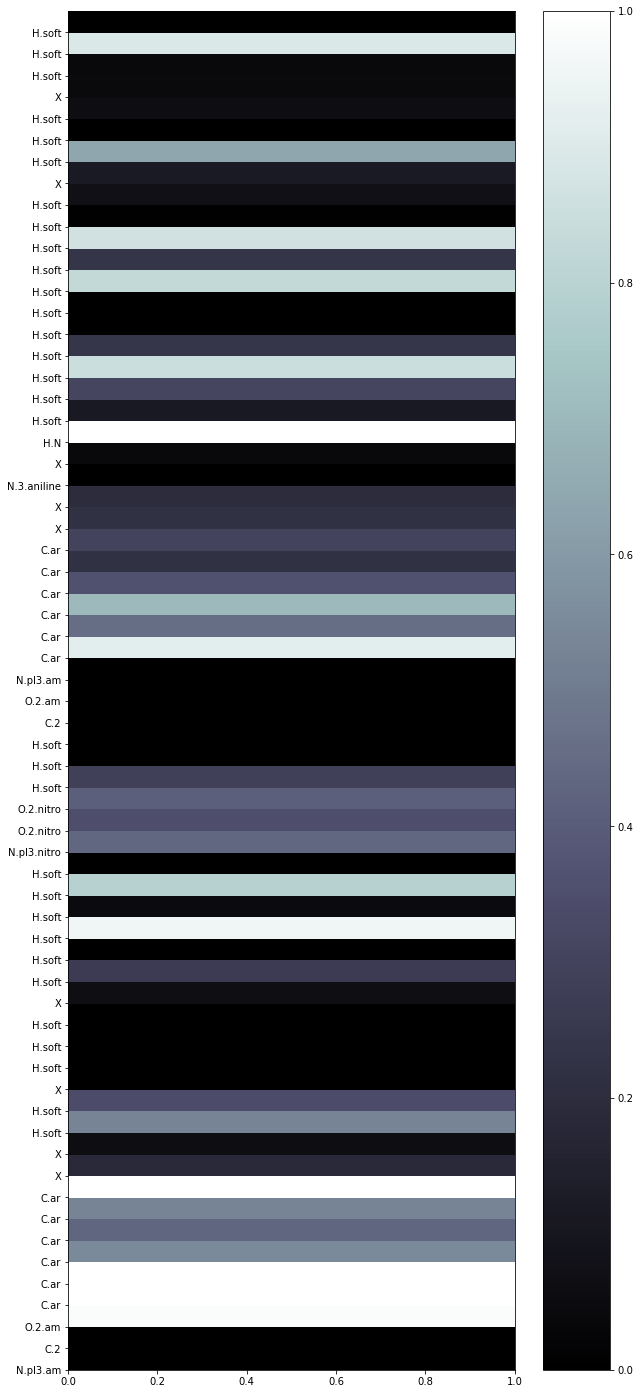

In [167]:
atypes = [v.type for k,v in self.Atom_L.items()]+[v.type for k,v in self.Atom_R.items()]
fig, ax = plt.subplots()
fig.set_size_inches(10, 25)
#func = (np.array(sf).T) - (np.array(sb).T)
#func = np.divide(func,(np.array(sf).T), out=np.zeros_like(func), where=(np.array(sf).T)!=0)
#func = (np.array(sf).T)
func = a.reshape(63,1)
im = ax.pcolormesh(func,cmap="bone")
#ax.set_xticks(np.arange(len(p_array)));
ax.set_yticks(np.arange(len(atypes)));
ax.set_yticklabels(atypes);
#ax.set_xticklabels(np.round(p_array,2));
fig.colorbar(im);

In [21]:
probe_dict_2 = {}
p_array = np.round(np.arange(0,1.1,0.1),2)
f_array = np.round(np.arange(0.1,0.8,0.1),2)
for i in EtF:
    comps = i[0:2]
    PDB_file1 = f"{path}/{comps[0]}/{comps[0]}.pdb"
    PDB_file2 = f"{path}/{comps[1]}/{comps[1]}.pdb"
    PDB_preprocess(PDB_file1, PDB_file2, "ssip")
    self = Scoring(PDB_file1, PDB_file2, max_aip_dist=0.15, from_PDB=True, bypass_at08=False, ext_upon_desolv=0.05)
    if len(self.non_polar_add) > 0:
        add = sum(self.non_polar_add.ddG_sc)
    if True:
        if i[0] == "comp1": #comp3 for ZIPPERS2/3
            for p in p_array:
                frac_dict = {}
                for f in f_array:
                    _,_,c,d,e = get_desolvated_AIPs(self, "chloroform", probe_radius=p, frac_to_desolv=f)
                    solv_H = excl_DMC(self)
                    frac_dict[f] = [sum(d)+sum(c)+solv_H+add]
                probe_dict_2[p] = frac_dict
        else:
            for p in p_array:
                for f in f_array:
                    _,_,c,d,e = get_desolvated_AIPs(self, "chloroform", probe_radius=p, frac_to_desolv=f)
                    solv_H = excl_DMC(self)
                    probe_dict_2[p][f].append(sum(d)+sum(c)+solv_H+add)

# Histograms for just p_array

In [31]:
arom_a_dict = {}
p_array = np.round(np.arange(0,1.1,0.1),2)
f=0.5
for i in EtF:
    comps = i[0:2]
    PDB_file1 = f"{path}/{comps[0]}/{comps[0]}.pdb"
    PDB_file2 = f"{path}/{comps[1]}/{comps[1]}.pdb"
    PDB_preprocess(PDB_file1, PDB_file2, "ssip")
    self = Scoring(PDB_file1, PDB_file2, max_aip_dist=0.1, from_PDB=True, bypass_at08=False)
    atypes = [v.type for k,v in self.Atom_L.items()]+[v.type for k,v in self.Atom_R.items()]
    for p in p_array:
        if i[0] == "comp1":
            arom_a_dict[p] = []
        _,a,_,_,_ = get_desolvated_AIPs(self, "chloroform", probe_radius=p, frac_to_desolv=f)
        [arom_a_dict[p].append(x) for q, x in enumerate(a) if atypes[q] == "C.ar"]


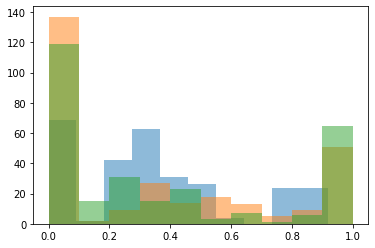

In [32]:
#C.ar in edge-to-face desolvation histogram
plt.hist(arom_a_dict[0.1],alpha=0.5);
plt.hist(arom_a_dict[0.2],alpha=0.5);
plt.hist(arom_a_dict[0.3],alpha=0.5);

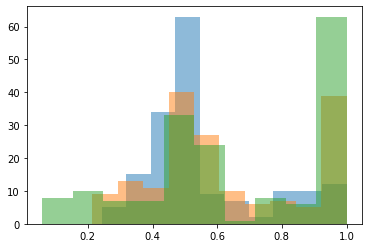

In [392]:
#H.soft in edge-to-face desolvation histogram
plt.hist(h_soft_dict[0.1],alpha=0.5);
plt.hist(h_soft_dict[0.2],alpha=0.5);
plt.hist(h_soft_dict[0.3],alpha=0.5);

# Final KEY interactive plot

In [36]:
with open('EtoF2_probe_frac_ext05+ext.pkl', 'rb') as f:
    probe_dict_2 = pickle.load(f)

In [37]:
#EtoF
p_array = np.round(np.arange(0,1.1,0.1),2)
f_array = np.round(np.arange(0.1,0.8,0.1),2)
abproduct = np.array([-13.45,-10.46,-5.88,-5.57,-9.85,-7.13,-8.94,-11.02,-4.28,-3.17,-4.27,-3.96,-4.86,-5.30,
            -4.87,-5.24,-12.49,-12.04,-6.95,-6.41,-7.79,-8.37,-9.17,-8.27])
NA = np.nan
expt = np.array([-8.7,-9.2,NA,-1.8,-3.6,NA,-2.6,-5.6,-1,2.4,NA,-2.8,NA,-0.2,-0.4,-1.8,-6.2,-6.9,NA,-2.2,-2.8,NA,
                 -3.2,-4.8])

In [23]:
#ZIP
abproduct = [10.93,6.30,9.06,5.33,7.18,-1.60,-0.23,-0.49,11.62,13.73,11.65,3.60]
expt = [NA, 0.80,1.10,-1.20,0.20,-2.90,-3.20,-2.20,0.40,1.50,0.90,-1.70]


In [38]:
def plot_interactive(p, f):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.scatter(expt,abproduct,marker="x");
    #y = abproduct+np.array(probe_dict[p][f])+np.array(probe_dict_2[p][f])
    y = abproduct+np.array(probe_dict_2[p][f])
    ax.scatter(expt, y, marker="x");
    ax.plot(np.arange(-14,5),np.arange(-14,5));
    #ax.set_xlim(-11,4);
    #ax.set_ylim(-15,125);
    #ax.set_xlim(-4,2);
    
    #ax.set_ylim(-4,60);
    return

In [39]:
interact(plot_interactive, p=p_array, f=f_array);

interactive(children=(Dropdown(description='p', options=(0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0…